In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.callbacks import LearningRateScheduler
from keras.optimizers import SGD,Adam
from tensorflow.keras import utils

from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
import keras.backend as K


In [ ]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
print("x_train shape" + str(x_train.shape))
print("y_train shape" + str(y_train.shape))

x_train shape(50000, 32, 32, 3)
y_train shape(50000, 1)


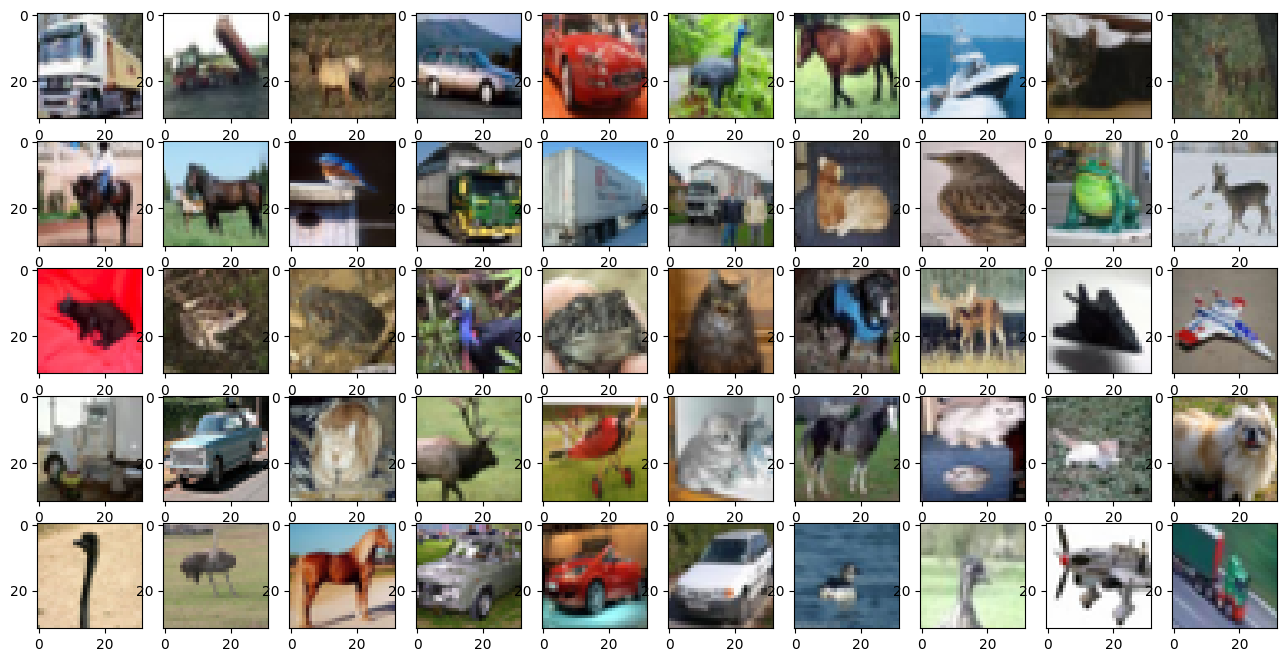

In [ ]:
fig=plt.figure(figsize=(16, 8))
columns = 10
rows = 5
for i in range(1, columns*rows +1):
    img = x_train[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

In [ ]:
X_train = x_train.astype('float32')
X_test = x_test.astype('float32')
X_train /= 255
X_test /= 255

In [ ]:
Y_train = utils.to_categorical(y_train, 10)
Y_test = utils.to_categorical(y_test, 10)

In [ ]:
model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32,32,3)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))


model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))


model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [ ]:
sgd = SGD(lr=1e-3, momentum=0.9, nesterov=True)

adam = Adam(lr=1e-3)

# 8. Compile model
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])


In [ ]:

min_epochs = 40  # After this number, user will be asked whether to run another epoch or not
factor = 10 # Factor by which learning rate should be decreased
e_red = 0

# Learning Rate Scheduler
def scheduler(epoch):
  n = K.eval(model.optimizer.lr)
  if i == 'R' or i == 'r':
    n /= factor
  return n

change_lr = LearningRateScheduler(scheduler)
callbacks_list = [change_lr]


count = 1
flag = 1
i = 'y'
val = []
train = []

while flag==1:

  print("\n\nINFO: Training epoch number: " + str(count) + " with learning rate: " + str(K.eval(model.optimizer.lr)) + "\n")

  history = model.fit(X_train, Y_train, batch_size=32, epochs=1, verbose=1,validation_split=0.1,callbacks=callbacks_list)


  # Appending validation accuracy to list to check whether lr needs to be reduced
  val.append(history.history['val_accuracy'])
  train.append(history.history['accuracy'])

  # To decrease learning rate
  if len(val) > 3:
    if val[len(val)-1][0] - val[len(val)-4][0] < 0.01 and count - e_red > 2:
      print("INFO: Reducing learning rate by factor of 10 after the next epoch")
      # Setting the parameter for scheduler
      i = 'r'
      e_red = count
    else:
      i = 'n'

  # Checking if another epoch needs to be run
  if count > min_epochs:
    print("Type y for running another epoch")
    print("Type n to stop the training")
    inp = input()
    if inp == 'y' or inp == 'Y':
      flag = 1
    elif inp == 'n' or inp == 'N':
      flag = 0

  #Increasing the epoch number
  count += 1





INFO: Training epoch number: 1 with learning rate: 0.001

1407/1407 [==============================] - 47s 34ms/step - loss: 1.6965 - accuracy: 0.3275 - val_loss: 1.7707 - val_accuracy: 0.3362 - lr: 0.0010


INFO: Training epoch number: 2 with learning rate: 0.001

1407/1407 [==============================] - 49s 35ms/step - loss: 1.5572 - accuracy: 0.3924 - val_loss: 1.7987 - val_accuracy: 0.3644 - lr: 0.0010


INFO: Training epoch number: 3 with learning rate: 0.001

1407/1407 [==============================] - 47s 34ms/step - loss: 1.3837 - accuracy: 0.4907 - val_loss: 1.9443 - val_accuracy: 0.3336 - lr: 0.0010


INFO: Training epoch number: 4 with learning rate: 0.001

1407/1407 [==============================] - 47s 33ms/step - loss: 1.1940 - accuracy: 0.5870 - val_loss: 1.0620 - val_accuracy: 0.6196 - lr: 0.0010


INFO: Training epoch number: 5 with learning rate: 0.001

1407/1407 [==============================] - 47s 33ms/step - loss: 1.0326 - accuracy: 0.6562 - val_loss: 0.9

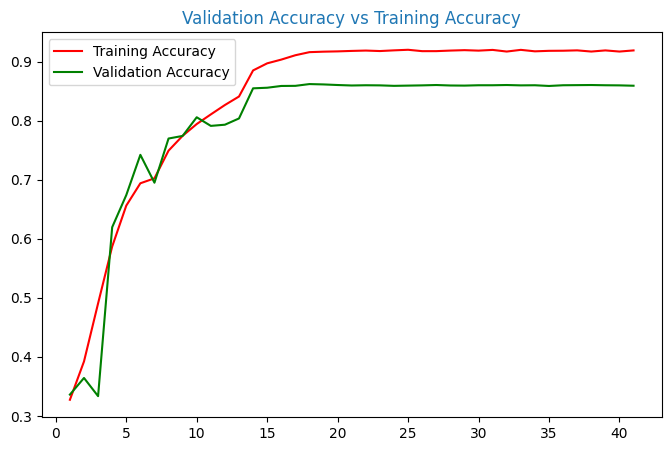

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_title('Validation Accuracy vs Training Accuracy', color='C0')
ax.plot(range(1,len(train)+1),train[:len(train)],  label='Training Accuracy',color='red')
ax.plot(range(1,len(train)+1),val, label='Validation Accuracy', color='green')
ax.legend()

In [ ]:
 # 10. Evaluate model on test data
score = model.evaluate(X_test, Y_test, verbose=0)
print("Loss: " + str(score[0]))
print("Accuracy: " + str(score[1]*100) + "%")

Loss: 0.50541752576828
Accuracy: 85.55999994277954%
